# Stocks Prediction using RNN-LSTM

## 1- Import packages 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## 2- Import Data 

In [87]:
dataset_train = pd.read_csv('C:\\Users\smart\Desktop\GitHub\RNN-LSTM-Stocks\data base\Google_Stock_Price_Train.csv','r',delimiter=
                           ',')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [112]:
dataset_test = pd.read_csv('C:\\Users\smart\Desktop\GitHub\RNN-LSTM-Stocks\data base\Google_Stock_Price_Test.csv','r',delimiter=
                           ',')
dataset_test.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [90]:
training_set = dataset_train.iloc[:,1:2].values
training_set.shape

(1258, 1)

In [91]:
training_set[0:10,:]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04],
       [313.7 ],
       [310.59],
       [314.43],
       [311.96],
       [314.81]])

In [113]:
testing_set = dataset_test.iloc[:,1:2].values
testing_set.shape

(20, 1)

In [114]:
testing_set[0:10,:]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08]])

## 3- Data Preprocessing 

In [92]:
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled[0:5,:]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [115]:
# Creating training data with 60 time steps and one output:
x_train = []
y_train = []

for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [124]:
# combining all data and creating test data with 60 time steps for prediction:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
predict_input = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
predict_input = predict_input.reshape(-1,1)
predict_input_scaled = scaler.fit_transform (predict_input)

x_predict = []
for i in range(60,80):
    x_predict.append(predict_input_scaled[i-60:i,0])
    
x_predict = np.array(x_predict)
x_predict = np.reshape(x_predict, (x_predict.shape[0], x_predict.shape[1],1))

In [119]:
len(dataset_total)

1278

## 4- Define the RNN Model structure

### 4-1- RNN initialization

In [100]:
regressor = Sequential()

### 4-2- Adding LSTM units and Dropout regularization

In [103]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [104]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [105]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [106]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### 4-3- Adding a dense layer

In [109]:
regressor.add(Dense(units = 1))

## 5- Compile the Model

In [110]:
regressor.compile (optimizer = 'adam', loss = 'mean_squared_error')

## 6- Fit the model to the training set

In [111]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.1545
Epoch 2/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0777
Epoch 3/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0717
Epoch 4/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0273
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0090
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0054
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 94/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0014


## 7- Predict 

In [127]:
predicted_stocks_prices_scaled = regressor.predict(x_predict)
predicted_stocks_prices_dollar = scaler.inverse_transform(predicted_stocks_prices_scaled)

## 8-  Visualize

<function matplotlib.pyplot.show(*args, **kw)>

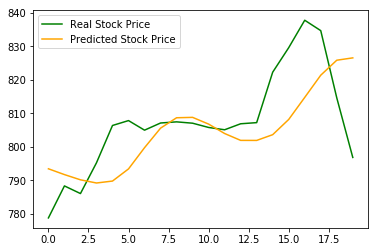

In [130]:
plt.plot(testing_set, color = 'green', label = "Real Stock Price")
plt.plot(predicted_stocks_prices_dollar, color = 'orange', label = 'Predicted Stock Price')
plt.legend()
plt.show